## 0. Modules

In [207]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pylab as plt
import seaborn as sns


---

## 1. Exploring the data
#### 1-1. Load the data

In [115]:
sample_submission = pd.read_csv('data/sample_submission.csv')
test = pd.read_csv('data/test.csv')
train = pd.read_csv('data/train.csv')

#### 1-2. Shape of the train data

In [116]:
train.shape

(1460, 81)

#### 1-3. Raw 'SalePrice' Check

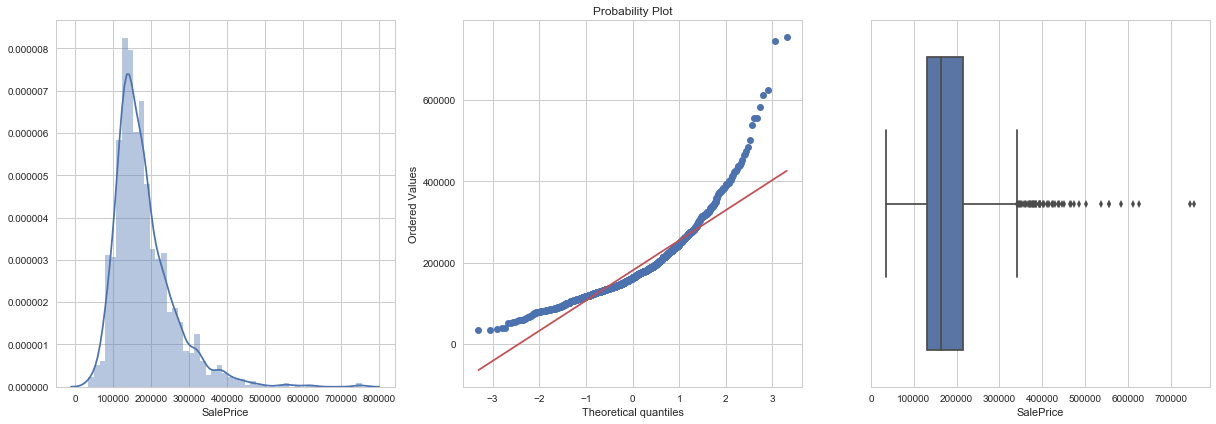

[ SalePrice Description ]

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [227]:
plt.figure(figsize=(17,6))

plt.subplot(131)
sns.distplot(train["SalePrice"])

plt.subplot(132)
stats.probplot(train["SalePrice"], plot=plt)

plt.subplot(133)
sns.boxplot(train["SalePrice"])
plt.tight_layout()
plt.show()

print('[ SalePrice Description ]\n')
print(train["SalePrice"].describe())

#### 1-4. Log 'SalePrice' Check

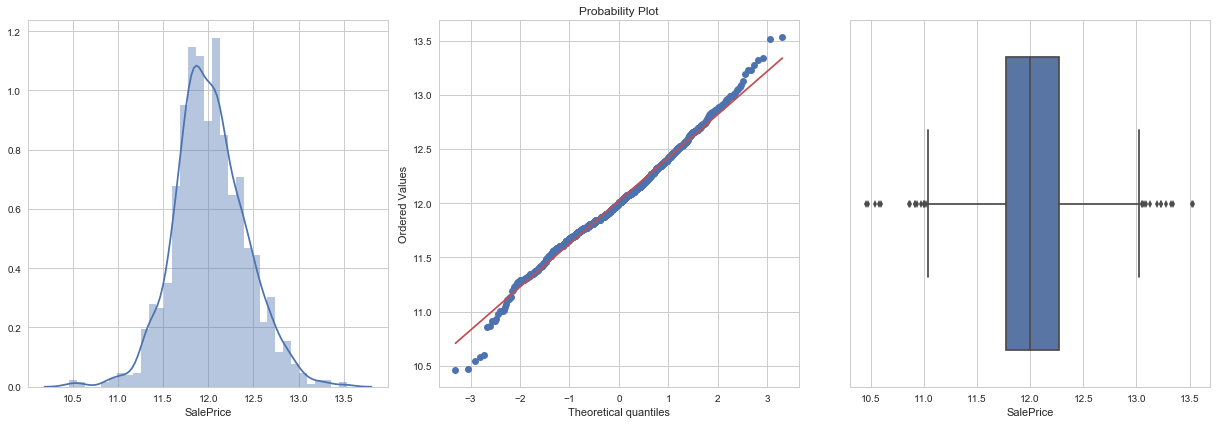

In [218]:
log_SalePrice = np.log(train["SalePrice"])

plt.figure(figsize=(17,6))

plt.subplot(131)
sns.distplot(log_SalePrice)

plt.subplot(132)
stats.probplot(log_SalePrice, plot=plt)

plt.subplot(133)
sns.boxplot(log_SalePrice)
plt.tight_layout()
plt.show()

#### 1-5. Description of the train data (without 'Object' variables)

In [117]:
train_desc = train.describe().transpose()
train_desc

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


---

## 2. EDA for all variables
### 2-1. Numerical Variables
- **area**: LotArea, MasVnrArea, GrLivArea, GarageArea, ScreenPorch, PoolArea
- **basement**: BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF
- **floor**: 1stFlrSF, 2ndFlrSF
- **porch**: OpenPorchSF, EnclosedPorch, 3SsnPorch
- **etc**: LotFrontage, LowQualFinSF, WoodDeckSF

#### 2-1-1. Make numerical variables

In [166]:
num_vars=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',\
           '2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',\
           'ScreenPorch','PoolArea']
print('Numerical variables count: ' + str(len(num_vars)))

Numerical variables count: 18


#### 2-1-2. All Numerical Variable Distplots

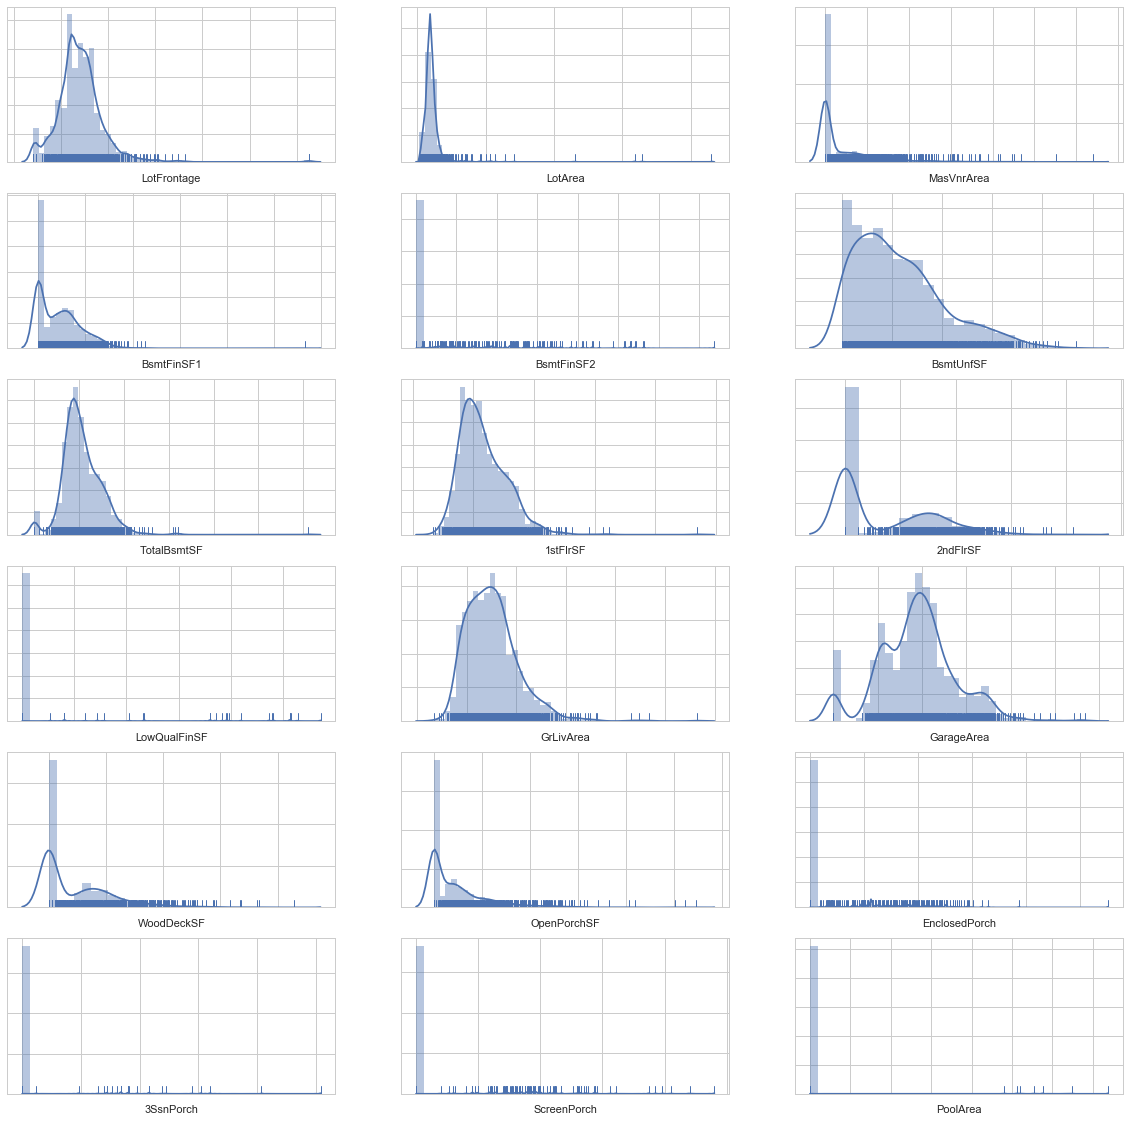

In [146]:
fig, ax = plt.subplots(6,3, figsize = (20,20))

for idx, column in enumerate(num_vars):
    if column == 'SalePrice':
        continue
    sns.distplot(train[column].dropna(), kde=True, rug=True, ax = ax[idx//3,idx%3])
    ax[idx//3, idx%3].set(yticklabels=[])
    ax[idx//3, idx%3].set(xticklabels=[])

### 2-2. Categorical Variables
- **sale**: SaleType, SaleCondition
- **date**: YearBuilt, YearRemodAdd, GarageYrBlt, MoSold, YrSold
- **overall**: OverallQual, OverallCond
- **type** & **rating**: MSSubClass, MSZoning, BldgType, HouseStyle, Functional
- **room**: BedroomAbvGr, TotRmsAbvGrd
- **bath**: BsmtFullBath, BsmtHalfBath, FullBath, HalfBath
- **heat** & **aircon** & **elec**: Heating, HeatingQC, CentralAir, Electrical
- **kitchen**: KitchenAbvGr, KitchenQual
- **fireplace**: Fireplaces, FireplaceQu
- **street**: Street, Alley, Condition1, Condition2
- **garage**: GarageType, GarageFinish, GarageCars, GarageQual, GarageCond
- **basement**: BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2
- **exter**: Exterior1st, Exterior2nd, ExterQual, ExterCond
- **lot** & **land**: LotShape, LandContour, LotConfig, LandSlope
- **roof**: RoofStyle, RoofMatl
- **miscellaneous**: MiscFeature, MiscVal
- **etc**: Utilities, Neighborhood, MasVnrType, Foundation, PavedDrive, PoolQC, Fence

#### 2-2-1. Make Categorical Variables

In [167]:
cat_vars = [c for c in train.columns if c not in num_vars]
cat_vars.remove('SalePrice')
cat_vars.remove('Id')
print('Categorical variables count: ' + str(len(cat_vars)))

Categorical variables count: 61


#### 2-2-2. Grouping Categorical Variables

In [121]:
sale_vars=['SaleType','SaleCondition']
date_vars=['YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold']
inside_vars=['BldgType','HouseStyle','Heating','HeatingQC','CentralAir','Electrical',\
            'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',\
            'KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','FireplaceQu']
outside_vars=['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour',\
            'Utilities','LotConfig','LandSlope','Neighborhood','Condition1',\
            'Condition2','OverallQual','OverallCond','RoofStyle','RoofMatl',\
            'Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond',\
            'Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',\
            'BsmtFinType2','GarageType','GarageFinish','GarageCars','GarageQual',\
            'GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','MiscVal']

In [128]:
print('Sale variables count: ' + str(len(sale_vars)))
print('Date variables count: ' + str(len(date_vars)))
print('Inside variables count: ' + str(len(inside_vars)))
print('Outside variables count: ' + str(len(outside_vars)))

Sale variables count: 2
Date variables count: 5
Inside variables count: 17
Outside variables count: 37


#### 2-2-3. All Categorical Variable Countplots

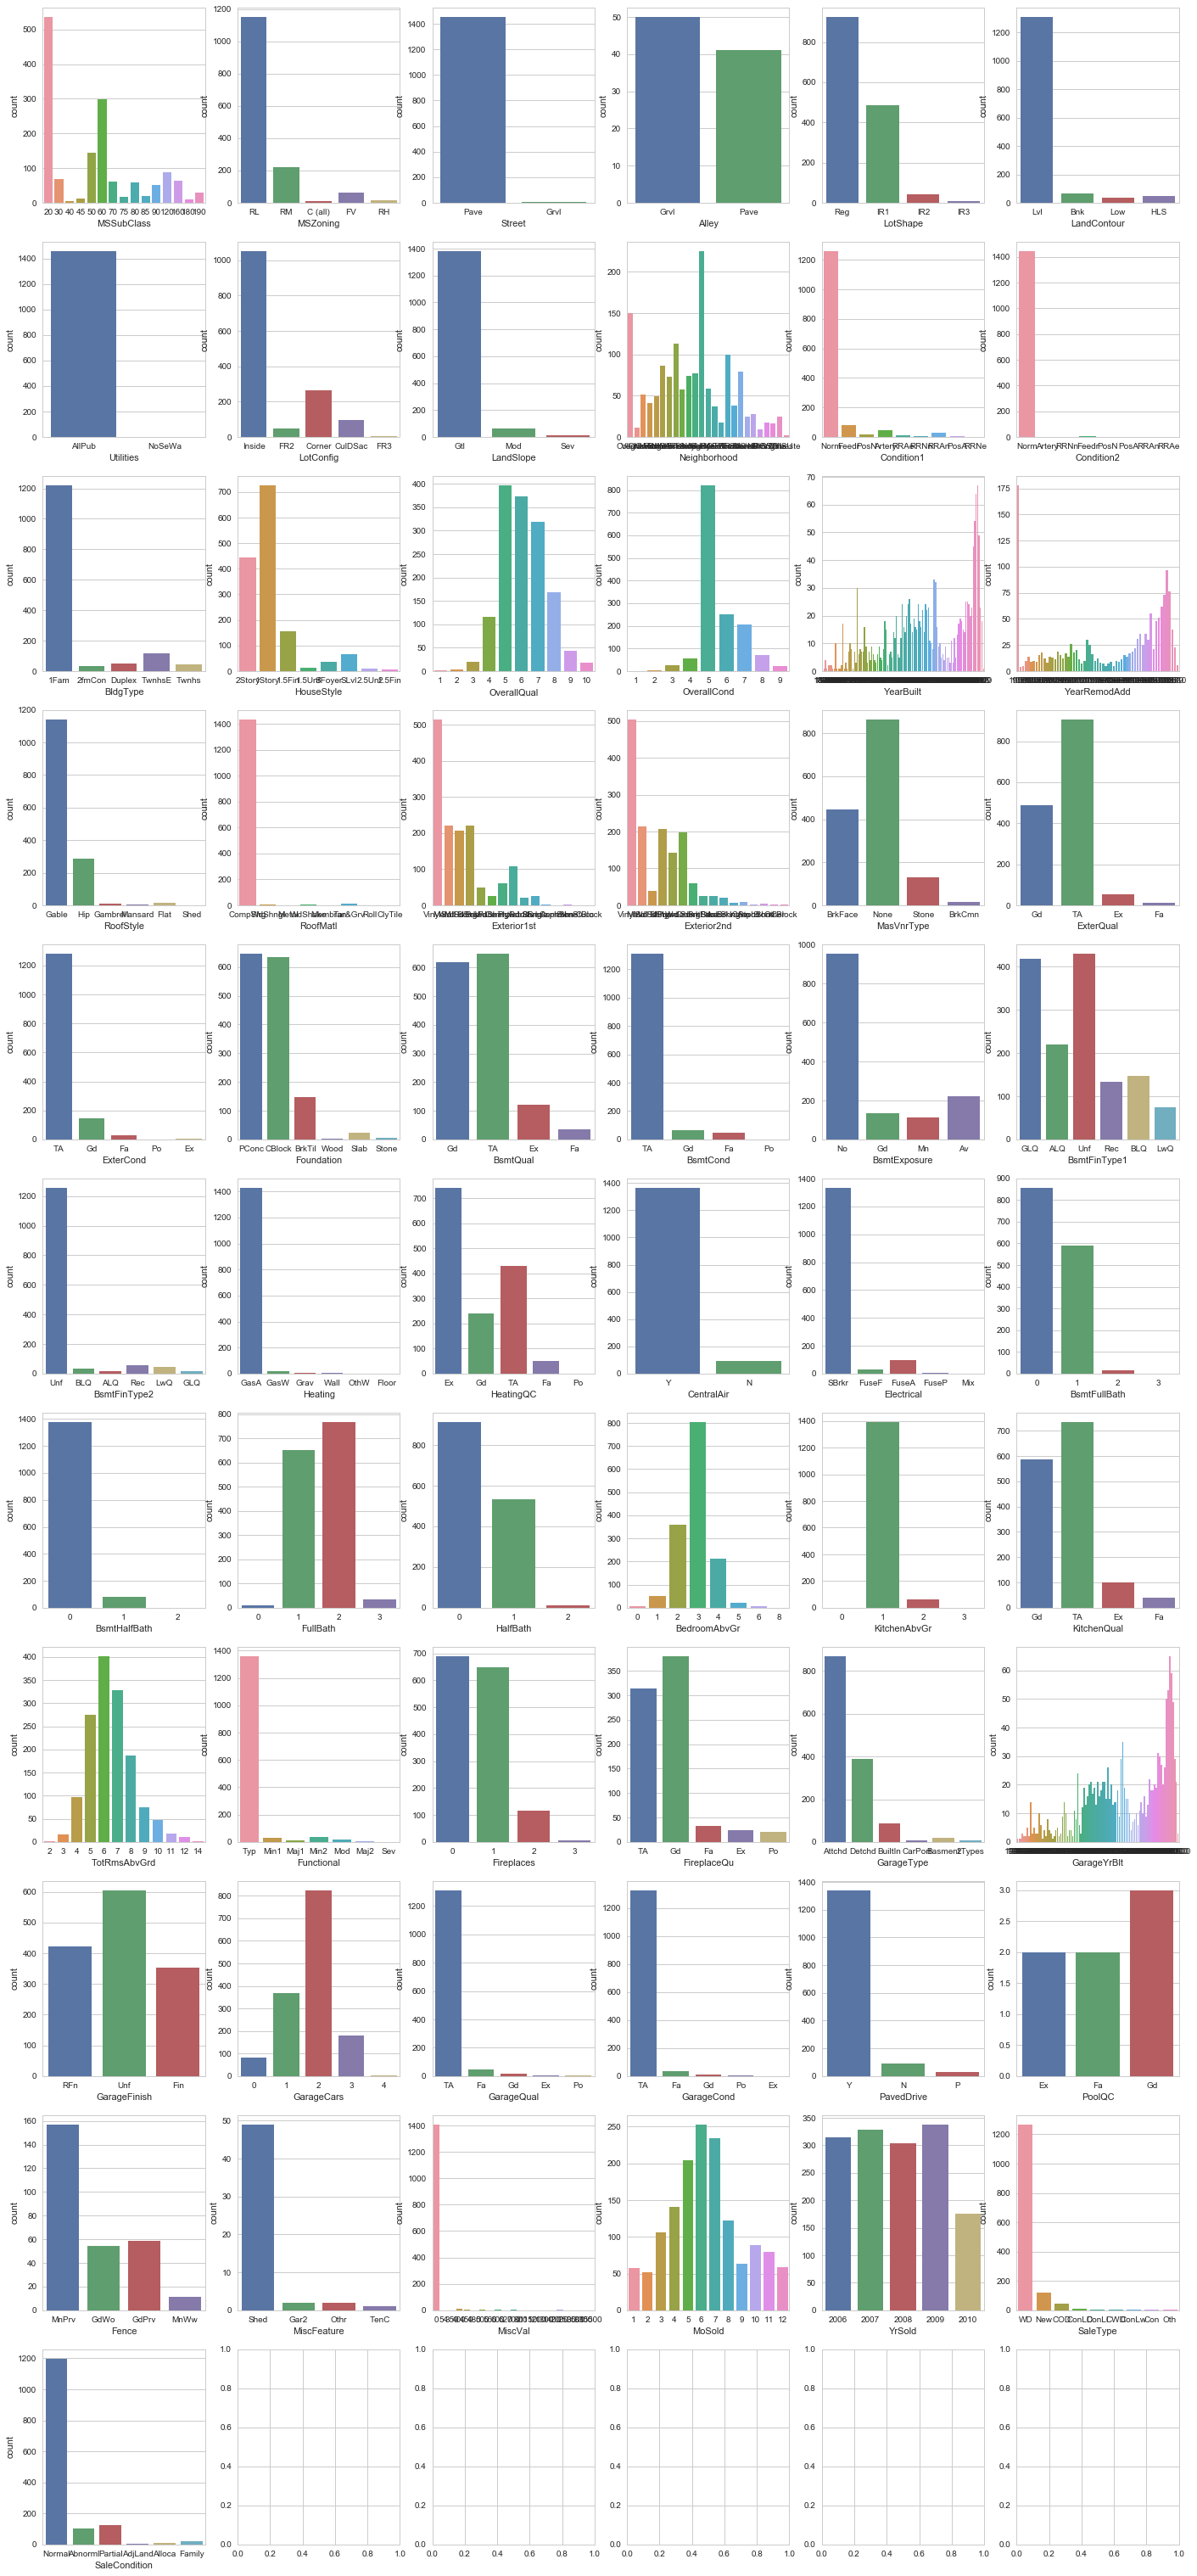

In [126]:
fig, ax = plt.subplots(11, 6, figsize = (24, 55))

for idx, column in enumerate(cat_vars):
    sns.countplot(column, data=train, ax = ax[idx // 6, idx % 6])

### 2-3. Relation between Saleprice and Variables

#### 2-3-1. Relation between Saleprice and All Numerical Variables

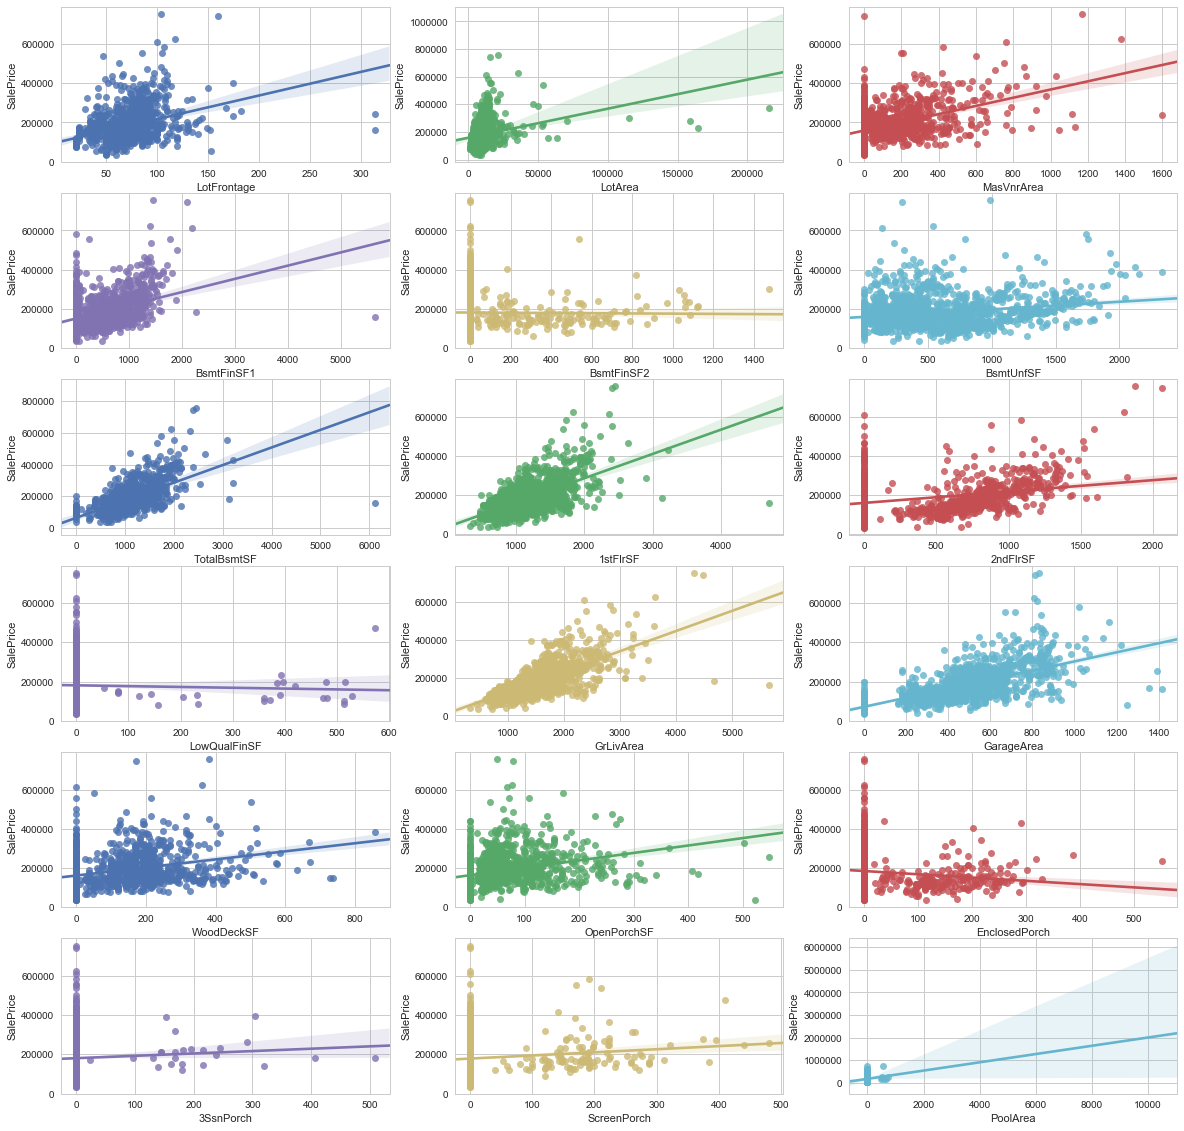

In [195]:
fig, ax = plt.subplots(6,3, figsize = (20,20))

for idx, column in enumerate(num_vars):
    if column == 'SalePrice':
        continue
    sns.regplot(x=column, y='SalePrice', data=train, ax = ax[idx//3,idx%3])

#### 2-3-2. Relation between Saleprice and Categorical Variables

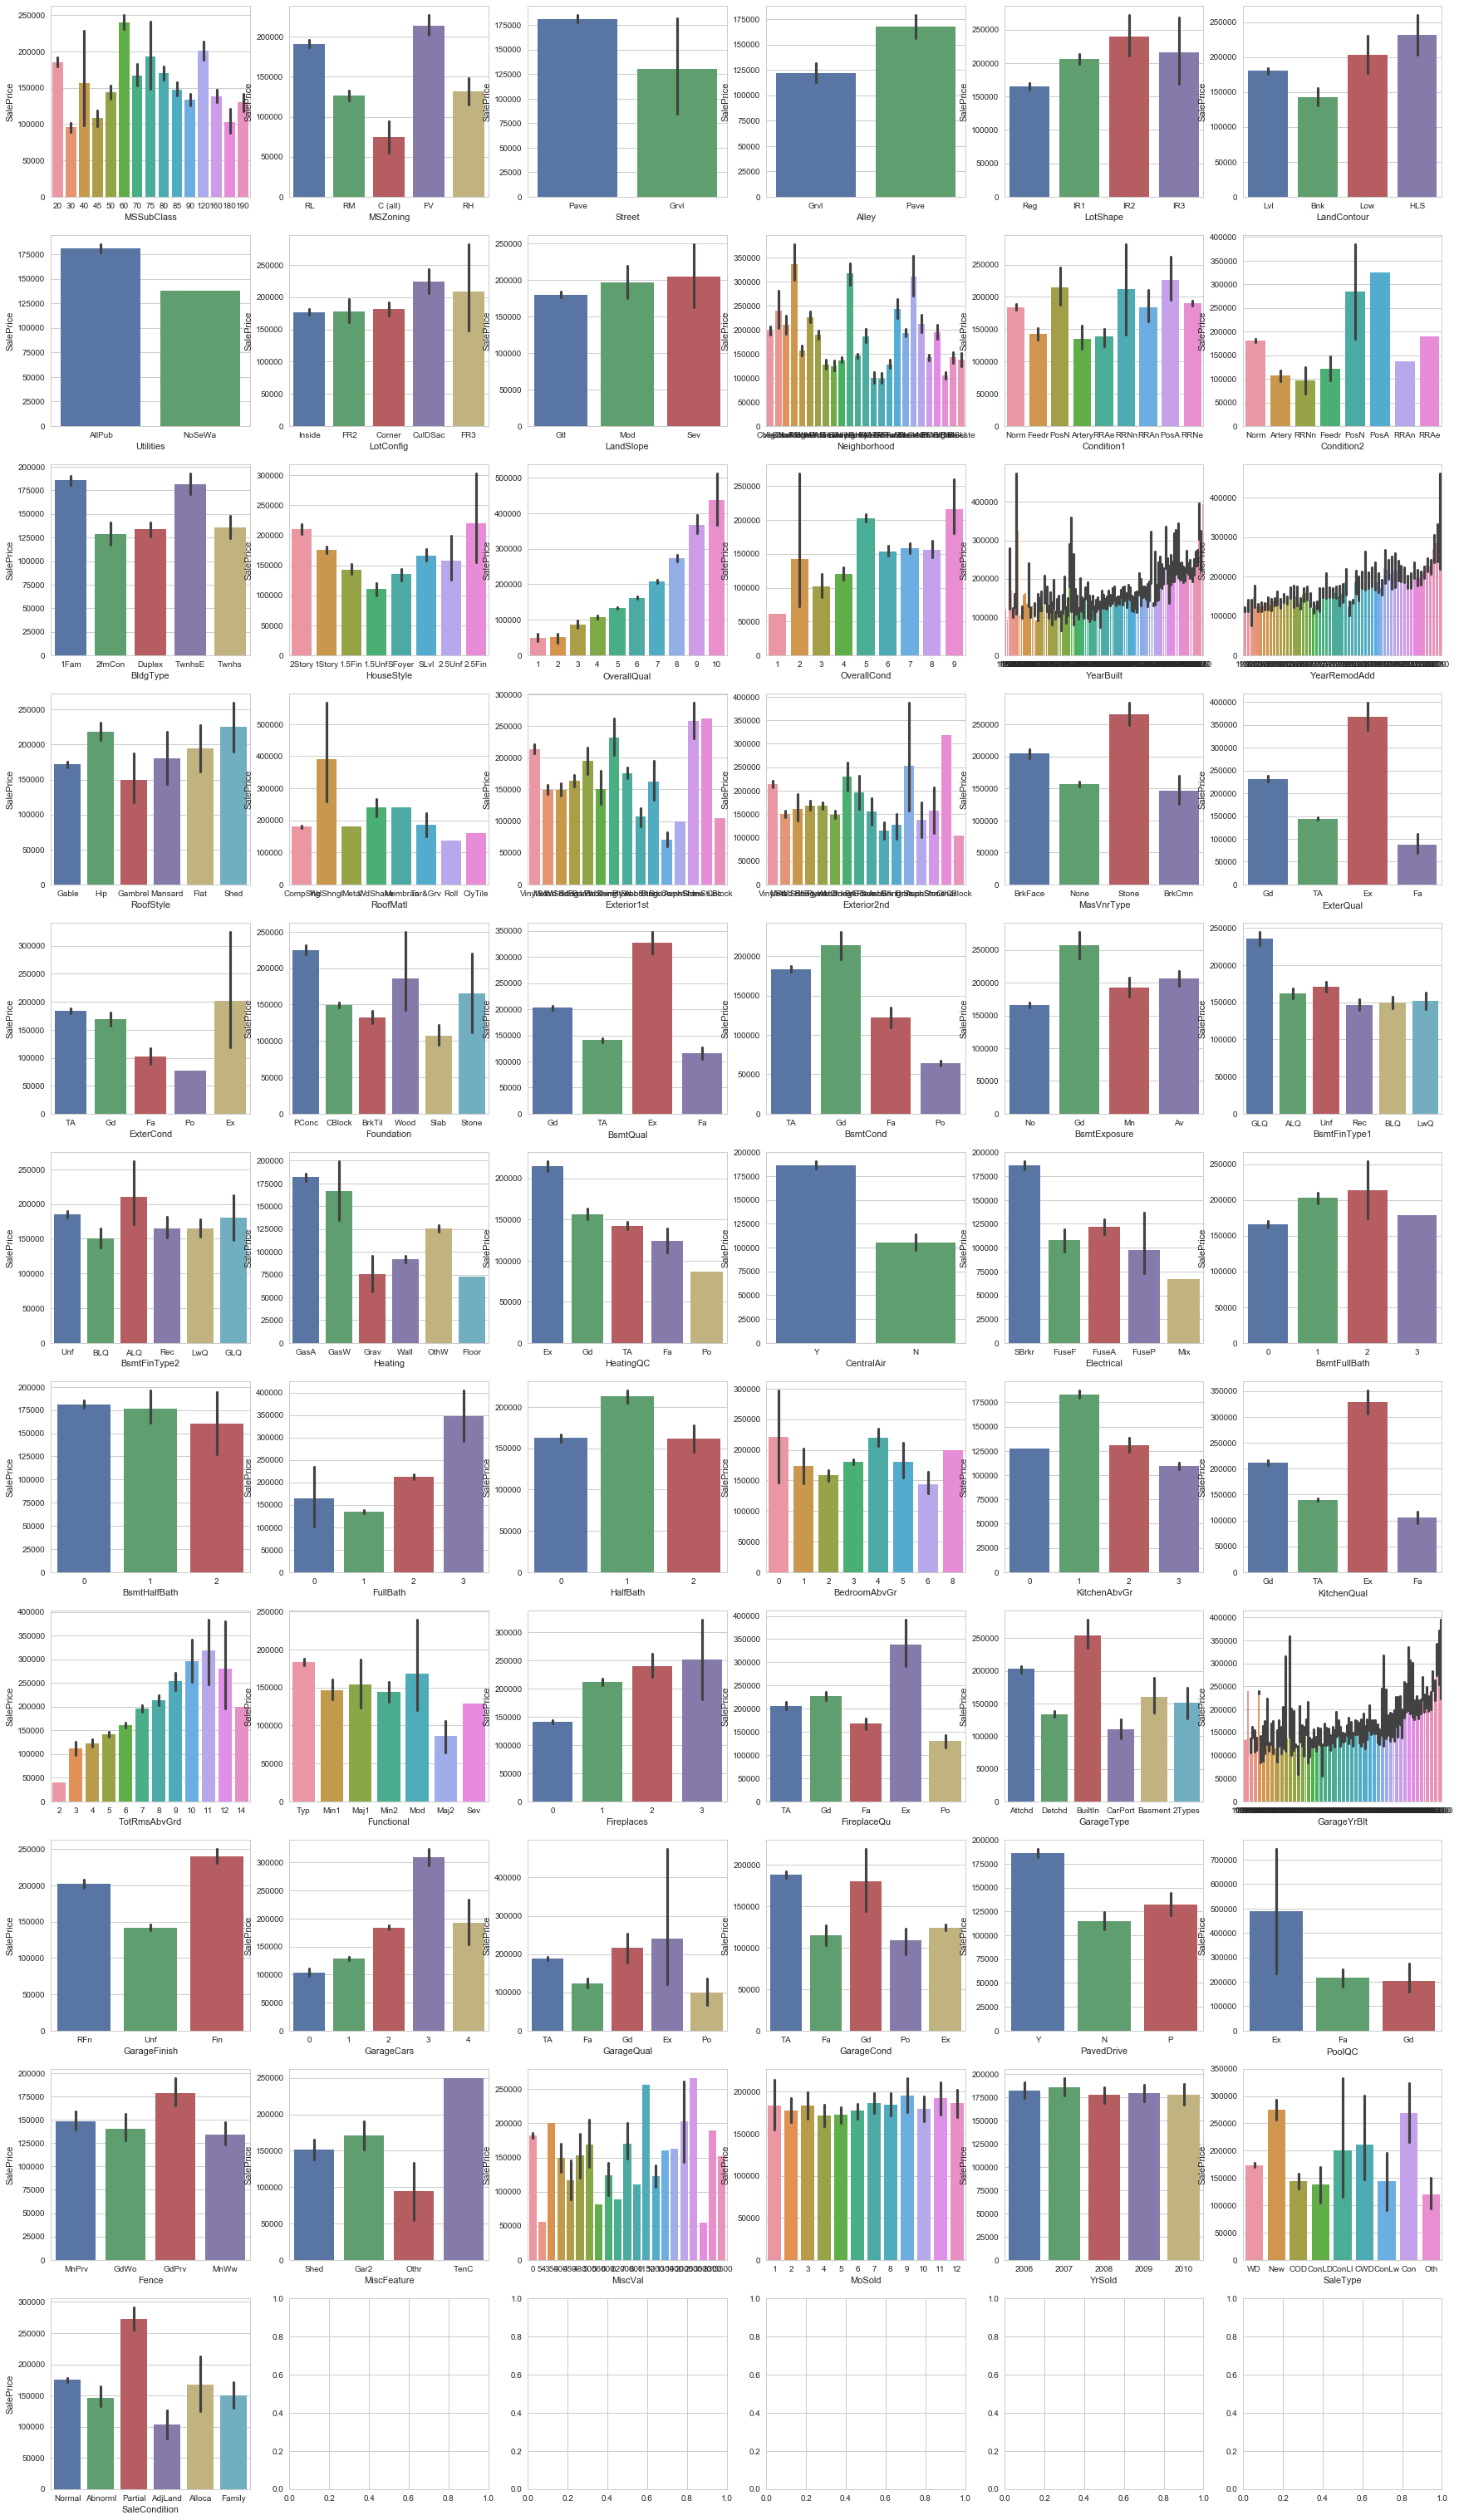

In [205]:
fig, ax = plt.subplots(11, 6, figsize = (30, 55))

for idx, column in enumerate(cat_vars):
    sns.barplot(x=column, y='SalePrice', data=train, ax = ax[idx // 6, idx % 6])

#### 2-3-3. Relation between Saleprice and Numerical & Categorical Variables by Group

- **area**: LotArea, MasVnrArea, GrLivArea, GarageArea
- **basement**: BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF
- **floor**: 1stFlrSF, 2ndFlrSF
- **porch**: OpenPorchSF, EnclosedPorch, 3SsnPorch
- **etc**: LotFrontage, LowQualFinSF, WoodDeckSF

- **sale**: SaleType, SaleCondition
- **date**: YearBuilt, YearRemodAdd, GarageYrBlt, MoSold, YrSold
- **overall**: OverallQual, OverallCond
- **type** & **rating**: MSSubClass, MSZoning, BldgType, HouseStyle, Functional
- **room**: BedroomAbvGr, TotRmsAbvGrd
- **bath**: BsmtFullBath, BsmtHalfBath, FullBath, HalfBath
- **heat** & **aircon** & **elec**: Heating, HeatingQC, CentralAir, Electrical
- **kitchen**: KitchenAbvGr, KitchenQual
- **fireplace**: Fireplaces, FireplaceQu
- **street**: Street, Alley, Condition1, Condition2
- **garage**: GarageType, GarageFinish, GarageCars, GarageQual, GarageCond
- **basement**: BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2
- **exter**: Exterior1st, Exterior2nd, ExterQual, ExterCond
- **lot** & **land**: LotShape, LandContour, LotConfig, LandSlope
- **roof**: RoofStyle, RoofMatl
- **miscellaneous**: MiscFeature, MiscVal
- **etc**: Utilities, Neighborhood, MasVnrType, Foundation, PavedDrive, PoolQC, Fence

#### 위에 2-3-3은 어떻게 해야될지 모르겠다. 일단 패스

## 3. Feature Engineering
### 3-1. Missing Values